<a href="https://colab.research.google.com/github/dev-EthanJ/scikit-learn_Machine_Learning/blob/main/20221116_scikit-learn_ML_LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scikit-learn Machine Learning LightGBM <br> 사이킷런 머신러닝 LightGBM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
# https://www.kaggle.com/datasets/kartik2112/fraud-detection

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/fraud.csv'
df = pd.read_csv(file_url)

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

- `trans_date_trans_time` : 거래 시간
- `cc_num` : 카드 번호. 고윳값이기 때문에 여기서는 id처럼 활용할 수 있음
- `merchant` : 거래 상점
- `category` : 거래 상점의 범주(애완용품, 여행, 엔터테인먼트 등)
- `amt`: 거래금액 (amount)
- `first`, `last` : 이름
- `gender` : 성별
- `street`, `state`, `zip` : 고객 거주지 정보
- `lat` ,`long` : 고객주소에 대한 위도 및 경도
- `city_pop` : 고객의 zipcode 속하는 인구 수
- `job` : 직업
- `dob` : 생년월일
- `trans_num` : 거래번호
- `unix_time` : 거래시간 (유닉스 타임스탬프)
- `merch_lat`, `merch_long` : 상점의 위경도
- `is_fraud` : 사기거래 여부 (이상거래 여부): target

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [5]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1852394 non-null  object 
 1   cc_num                 1852394 non-null  int64  
 2   merchant               1852394 non-null  object 
 3   category               1852394 non-null  object 
 4   amt                    1852394 non-null  float64
 5   first                  1852394 non-null  object 
 6   last                   1852394 non-null  object 
 7   gender                 1852394 non-null  object 
 8   street                 1852394 non-null  object 
 9   city                   1852394 non-null  object 
 10  state                  1852394 non-null  object 
 11  zip                    1852394 non-null  int64  
 12  lat                    1852394 non-null  float64
 13  long                   1852394 non-null  float64
 14  city_pop          

In [6]:
pd.options.display.float_format = '{:.2f}'.format

df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00
mean,417386038393710400.00,70.06,48813.26,38.54,-90.23,88643.67,1358674218.83,38.54,-90.23,0.01
std,1309115265318734848.00,159.25,26881.85,5.07,13.75,301487.62,18195081.39,5.11,13.76,0.07
min,60416207185.00,1.00,1257.00,20.03,-165.67,23.00,1325376018.00,19.03,-166.67,0.00
25%,180042946491150.00,9.64,26237.00,34.67,-96.80,741.00,1343016823.75,34.74,-96.90,0.00
50%,3521417320836166.00,47.45,48174.00,39.35,-87.48,2443.00,1357089331.00,39.37,-87.44,0.00
75%,4642255475285942.00,83.10,72042.00,41.94,-80.16,20328.00,1374581485.25,41.96,-80.25,0.00
max,4992346398065154048.00,28948.90,99921.00,66.69,-67.95,2906700.00,1388534374.00,67.51,-66.95,1.00


## Data pre-processing

### 의미 없는 Data 제거

In [7]:
df = df.drop(columns=['first', 'last', 'street', 'city', 'state', 'zip',
                      'trans_num', 'unix_time', 'job', 'merchant'])

df.columns

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'lat',
       'long', 'city_pop', 'dob', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   lat                    float64       
 6   long                   float64       
 7   city_pop               int64         
 8   dob                    object        
 9   merch_lat              float64       
 10  merch_long             float64       
 11  is_fraud               int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 169.6+ MB


### feature engineering

- 고객의 원래 거래 패턴에서 벗어나는 거래 탐지

#### 결제 금액

- 정규분포 Z점수: $\frac{x-\bar{x}}{\sigma}$

- `df.groupby().agg([list of value])`: 계산된 통계값을 묶어서 표현

    - `mean`: 평균, `std`: 표준편차, `amt`: 결제금액

In [9]:
# 각 카드번호별 '결제금액'의 평균, 표준편차
amt_info = df.groupby('cc_num').agg(['mean', 'std'])['amt'].reset_index()

amt_info.head()

,cc_num,mean,std
0,60416207185,59.26,142.87
1,60422928733,65.48,92.04
2,60423098130,96.38,1000.69
3,60427851591,107.49,131.01
4,60487002085,64.10,153.21


In [10]:
df = df.merge(amt_info, on='cc_num', how='left')

df.columns

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'lat',
       'long', 'city_pop', 'dob', 'merch_lat', 'merch_long', 'is_fraud',
       'mean', 'std'],
      dtype='object')

In [11]:
df[['cc_num', 'amt', 'mean', 'std']].head()

,cc_num,amt,mean,std
0,2703186189652095,4.97,89.41,127.53
1,630423337322,107.23,56.08,159.20
2,38859492057661,220.11,69.92,116.69
3,3534093764340240,45.00,80.09,280.08
4,375534208663984,41.96,95.34,94.32


In [12]:
df['amt_z_score'] = (df['amt'] - df['mean']) / df['std']

df['amt_z_score'].head()

0   -0.66
1    0.32
2    1.29
3   -0.13
4   -0.57
Name: amt_z_score, dtype: float64

In [13]:
df = df.drop(columns=['mean', 'std'])

df.columns

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'lat',
       'long', 'city_pop', 'dob', 'merch_lat', 'merch_long', 'is_fraud',
       'amt_z_score'],
      dtype='object')

### `category`별 `amt`(결제금액)

In [14]:
category_info = df.groupby(['cc_num', 'category']).agg(['mean', 'std'])['amt'].reset_index()

category_info.head()

,cc_num,category,mean,std
0,60416207185,entertainment,51.84,65.49
1,60416207185,food_dining,26.74,46.38
2,60416207185,gas_transport,59.78,15.76
3,60416207185,grocery_net,52.15,17.69
4,60416207185,grocery_pos,101.56,21.89


In [15]:
df = df.merge(category_info, on=['cc_num', 'category'], how='left')

In [16]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'lat',
       'long', 'city_pop', 'dob', 'merch_lat', 'merch_long', 'is_fraud',
       'amt_z_score', 'mean', 'std'],
      dtype='object')

In [17]:
df[['cc_num', 'category', 'amt', 'mean', 'std']].head()

,cc_num,category,amt,mean,std
0,2703186189652095,misc_net,4.97,84.86,116.07
1,630423337322,grocery_pos,107.23,99.64,23.90
2,38859492057661,entertainment,220.11,46.65,60.39
3,3534093764340240,gas_transport,45.00,61.54,15.75
4,375534208663984,misc_pos,41.96,35.48,4.93


In [18]:
df['cate_z_score'] = (df['amt'] - df['mean']) / df['std']

df['cate_z_score'].head()

0   -0.69
1    0.32
2    2.87
3   -1.05
4    1.31
Name: cate_z_score, dtype: float64

In [19]:
df = df.drop(columns=['mean', 'std'])

df.columns

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'lat',
       'long', 'city_pop', 'dob', 'merch_lat', 'merch_long', 'is_fraud',
       'amt_z_score', 'cate_z_score'],
      dtype='object')

### `distance`

In [20]:
import geopy.distance

- 두 지점간의 거리 (위도, 경도)

    - `geopy.distance.distance((lat1, long1), (lat2, long2))`

- `coordinate` 좌표, 위치: (위도, 경도)

    - 상점의 위치: merchant_coordinate > `merch_coor`

    - 고객의 위치: customer_coordinate > `custo_coor`

In [21]:
df['merch_coor'] = pd.Series(zip(df['merch_lat'], df['merch_long']))
df['custo_coor'] = pd.Series(zip(df['lat'], df['long']))

In [22]:
df['distance'] = df.apply(lambda x: geopy.distance.distance(x['merch_coor'], x['custo_coor']).km, axis=1)
df['distance'].head()

0    78.77
1    30.22
2   108.10
3    95.69
4    77.70
Name: distance, dtype: float64

- `distance().km`: float data type

In [23]:
distance_info = df.groupby('cc_num').agg(['mean', 'std'])['distance'].reset_index()

distance_info.head()

,cc_num,mean,std
0,60416207185,73.53,28.70
1,60422928733,78.99,29.30
2,60423098130,77.83,28.19
3,60427851591,75.71,28.98
4,60487002085,79.44,28.77


In [24]:
df = df.merge(distance_info, on='cc_num', how='left')
df['distance_z_score'] = (df['distance'] - df['mean']) / df['std']

df['distance_z_score'].head()

0    0.03
1   -1.48
2    1.16
3    0.82
4    0.06
Name: distance_z_score, dtype: float64

In [25]:
df = df.drop(['mean', 'std'], axis=1)

df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,cate_z_score,merch_coor,custo_coor,distance,distance_z_score
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.08,-81.18,3495,1988-03-09,36.01,-82.05,0,-0.66,-0.69,"(36.011293, -82.048315)","(36.0788, -81.1781)",78.77,0.03
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.89,-118.21,149,1978-06-21,49.16,-118.19,0,0.32,0.32,"(49.159047, -118.186462)","(48.8878, -118.2105)",30.22,-1.48
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.18,-112.26,4154,1962-01-19,43.15,-112.15,0,1.29,2.87,"(43.150704, -112.154481)","(42.1808, -112.262)",108.10,1.16
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.23,-112.11,1939,1967-01-12,47.03,-112.56,0,-0.13,-1.05,"(47.034331, -112.561071)","(46.2306, -112.1138)",95.69,0.82
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.42,-79.46,99,1986-03-28,38.67,-78.63,0,-0.57,1.31,"(38.674999, -78.632459)","(38.4207, -79.4629)",77.70,0.06


In [26]:
df = df.drop(columns=['cc_num', 'lat', 'long', 'merch_lat', 'merch_long', 'merch_coor', 'custo_coor'])

df.columns

Index(['trans_date_trans_time', 'category', 'amt', 'gender', 'city_pop', 'dob',
       'is_fraud', 'amt_z_score', 'cate_z_score', 'distance',
       'distance_z_score'],
      dtype='object')

In [27]:
df.isna().sum()

trans_date_trans_time      0
category                   0
amt                        0
gender                     0
city_pop                   0
dob                        0
is_fraud                   0
amt_z_score                0
cate_z_score             219
distance                   0
distance_z_score           0
dtype: int64

### `dob` > `age`

In [28]:
df['dob'].head()

0    1988-03-09
1    1978-06-21
2    1962-01-19
3    1967-01-12
4    1986-03-28
Name: dob, dtype: object

In [29]:
df['dob'] = pd.to_datetime(df['dob'])

df['dob']

0         1988-03-09
1         1978-06-21
2         1962-01-19
3         1967-01-12
4         1986-03-28
             ...    
1852389   1966-02-13
1852390   1999-12-27
1852391   1981-11-29
1852392   1965-12-15
1852393   1993-05-10
Name: dob, Length: 1852394, dtype: datetime64[ns]

In [30]:
# 만나이 계산
df['age'] = 2021 - df['dob'].dt.year

df['age']

0          33
1          43
2          59
3          54
4          35
           ..
1852389    55
1852390    22
1852391    40
1852392    56
1852393    28
Name: age, Length: 1852394, dtype: int64

In [31]:
df = df.drop(columns=['dob'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 11 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   city_pop               int64         
 5   is_fraud               int64         
 6   amt_z_score            float64       
 7   cate_z_score           float64       
 8   distance               float64       
 9   distance_z_score       float64       
 10  age                    int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 169.6+ MB


### `get_dummies()`

In [32]:
df = pd.get_dummies(df, columns=['category', 'gender'], drop_first=True)

df.tail()

,trans_date_trans_time,amt,city_pop,is_fraud,amt_z_score,cate_z_score,distance,distance_z_score,age,category_food_dining,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
1852389,2020-12-31 23:59:07,43.77,519,0,-0.17,-0.05,77.03,0.05,55,0,...,1,0,0,0,0,0,0,0,0,1
1852390,2020-12-31 23:59:09,111.84,28739,0,0.36,1.16,100.02,0.69,22,0,...,0,0,1,0,0,0,0,0,0,1
1852391,2020-12-31 23:59:15,86.88,3684,0,-0.02,0.44,80.89,0.29,40,0,...,0,0,1,0,0,0,0,0,0,0
1852392,2020-12-31 23:59:24,7.99,129,0,-0.59,-0.01,53.06,-0.73,56,0,...,0,0,0,0,0,0,0,0,1,1
1852393,2020-12-31 23:59:34,38.13,116001,0,-0.15,-0.38,72.38,-0.16,28,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   trans_date_trans_time    datetime64[ns]
 1   amt                      float64       
 2   city_pop                 int64         
 3   is_fraud                 int64         
 4   amt_z_score              float64       
 5   cate_z_score             float64       
 6   distance                 float64       
 7   distance_z_score         float64       
 8   age                      int64         
 9   category_food_dining     uint8         
 10  category_gas_transport   uint8         
 11  category_grocery_net     uint8         
 12  category_grocery_pos     uint8         
 13  category_health_fitness  uint8         
 14  category_home            uint8         
 15  category_kids_pets       uint8         
 16  category_misc_net        uint8         
 17  category_misc_pos        ui

### `set_index()`

In [34]:
df = df.set_index('trans_date_trans_time')

df.index

DatetimeIndex(['2019-01-01 00:00:18', '2019-01-01 00:00:44',
               '2019-01-01 00:00:51', '2019-01-01 00:01:16',
               '2019-01-01 00:03:06', '2019-01-01 00:04:08',
               '2019-01-01 00:04:42', '2019-01-01 00:05:08',
               '2019-01-01 00:05:18', '2019-01-01 00:06:01',
               ...
               '2020-12-31 23:57:18', '2020-12-31 23:57:50',
               '2020-12-31 23:57:56', '2020-12-31 23:58:04',
               '2020-12-31 23:58:34', '2020-12-31 23:59:07',
               '2020-12-31 23:59:09', '2020-12-31 23:59:15',
               '2020-12-31 23:59:24', '2020-12-31 23:59:34'],
              dtype='datetime64[ns]', name='trans_date_trans_time', length=1852394, freq=None)

## Training Model

In [35]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 814
)

In [36]:
import lightgbm as lgb

model = lgb.LGBMClassifier(random_state=np.random.randint(1000))
model.fit(X_train, y_train)

pred = model.predict(X_test)

## Evaluating Model

In [37]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.9965612085975184

- Data의 편향성

In [38]:
1 - df['is_fraud'].mean()

0.9947899852839083

## Visualizing Data

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [40]:
cf_matrix = confusion_matrix(y_test, pred)
print(cf_matrix)

[[368091    497]
 [   777   1114]]


In [41]:
group_name = ['TN', 'FP', 'FN', 'TP']
group_counts =  ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percent = ["{0:.2%}".format(value) for value in (cf_matrix.flatten() / np.sum(cf_matrix))]

labels = [f"{name}\n{counts}\n{percent}" for name, counts, percent in 
          zip(group_name, group_counts, group_percent)]
labels = np.asarray(labels).reshape(2, 2)

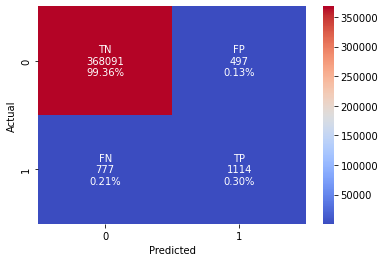

In [42]:
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

- `precision` 정밀도: 1종 오류

- `recall` 재현도: 2종 오류

- `f1-score`:  전체

In [43]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368588
           1       0.69      0.59      0.64      1891

    accuracy                           1.00    370479
   macro avg       0.84      0.79      0.82    370479
weighted avg       1.00      1.00      1.00    370479



### `model.predict_proba()`

- 분류되기 전에 얼만큼의 확률을 보였는지 나타냄

In [44]:
proba = model.predict_proba(X_test)

proba

array([[9.98217818e-01, 1.78218195e-03],
       [9.99986671e-01, 1.33289878e-05],
       [9.99978790e-01, 2.12096368e-05],
       ...,
       [9.99364896e-01, 6.35104025e-04],
       [9.99208655e-01, 7.91344878e-04],
       [9.99844602e-01, 1.55398232e-04]])

- 각각의 행: 입력받은 test data별

    - 1열: 0에 대한 예측값(target이 아닐 예측)

    - 2열: 1에 대한 예측값(target일 예측)

        - 모든 행의 2열: 1에 대한 예측값: target(이상거래)

In [45]:
proba[:, 1]

array([1.78218195e-03, 1.33289878e-05, 2.12096368e-05, ...,
       6.35104025e-04, 7.91344878e-04, 1.55398232e-04])

In [46]:
proba = proba[:, 1]

- default: `0.5` → 50% 초과면 1로 인정

    - `0.2`: 20%만 초과해도 1로 인정

    - `0.8`: 80%보다 초과해야 1로 인정

- `True`, `False` → `1`, `0`: int

In [47]:
proba_case1 = (proba > 0.2).astype('int')
proba_case2 = (proba > 0.8).astype('int')

In [48]:
def confusion_matrix_view(y_test, pred):
    cf_matrix = confusion_matrix(y_test, pred)
    print(cf_matrix)
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                        cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    print(classification_report(y_test, pred))

[[368091    497]
 [   777   1114]]


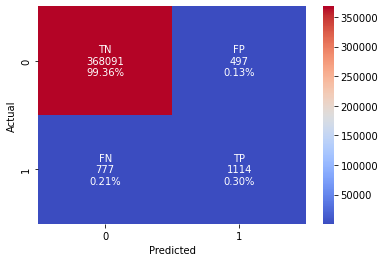

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368588
           1       0.69      0.59      0.64      1891

    accuracy                           1.00    370479
   macro avg       0.84      0.79      0.82    370479
weighted avg       1.00      1.00      1.00    370479



In [49]:
confusion_matrix_view(y_test, pred)

- case1) `0.2` 초과면 `1`: 1종오류 증가, 2종오류 감소

[[367573   1015]
 [   574   1317]]


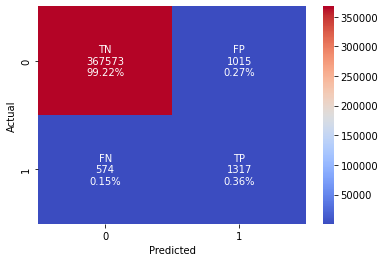

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368588
           1       0.56      0.70      0.62      1891

    accuracy                           1.00    370479
   macro avg       0.78      0.85      0.81    370479
weighted avg       1.00      1.00      1.00    370479



In [50]:
confusion_matrix_view(y_test, proba_case1)

- case2) `0.8`초과면 `1`: 1종오류 감소, 2종오류 증가

[[368255    333]
 [   878   1013]]


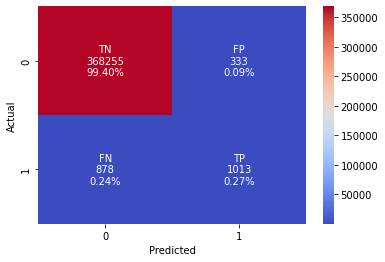

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368588
           1       0.75      0.54      0.63      1891

    accuracy                           1.00    370479
   macro avg       0.88      0.77      0.81    370479
weighted avg       1.00      1.00      1.00    370479



In [51]:
confusion_matrix_view(y_test, proba_case2)

## ROC 곡선 & AUC

- [Reference](https://losskatsu.github.io/machine-learning/stat-roc-curve/#2-%EB%AF%BC%EA%B0%90%EB%8F%84%EC%99%80-%ED%8A%B9%EC%9D%B4%EB%8F%84)

- binary classifier model을 평가하는 방법, 기준점에 영향을 받지 않기 때문에 여러 모델을 비교할 때 사용

- AUC: ROC 곡선의 아래 면적 → `0.5` ~ `1`, 값이 클수록 좋은 model

### ROC 곡선

> 민감도, 특이도 개념을 활용

<br>

#### 민감도 (TPR)

- $TPR = \frac{TP}{TP + FN}$

- 재현율`recall`과 같은 수식

- 실제 1인 것 중 얼만큼 1로 예측되었는지 나타내는 수치

- 1에 가까울수록 좋은 값

<br>

#### 특이도 (TNR)

- $TNR = \frac{TN}{FP + TN}$

- 실제 0인 것 중 얼만큼 1로 예측되었는지 나타내는 수치

- 0에 가까울수록 좋은 값

- $FPR = 1 - TNR$

![ROC](https://i.imgur.com/euCumVh.png)

- 기준점을 바꿨을 때, `TPR`, `FPR`이 바뀌는 모양을 나타낸 그래프

- 최악의 경우 (학습이 전혀 안 될 경우): 빨간색 점선

### AUC (Area Under the ROC Curve)

- ROC 곡선의 아래쪽에 해당하는 면적

- `0.5` ~ `1`사이의 값을 가지며 값이 클수록 해당 model이 더 좋은 classifier라는 의미

![AUC](https://i.imgur.com/udlCMW4.png)

## RandomGridSearch

- GridSearch: 모든 조합에 대해 modeling

    - RandomGridSearch: 더 넓은 영역의 hyperparamter값을 더 짧은 시간에 다양하게 활용 → 일부만 추출해서 사용


In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
parameters = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.25],
    'lambda_l1': [0, 10, 20, 30, 50],
    'lambda_l2': [0, 10, 20, 30, 50],
    'max_depth': [5, 10, 15, 20],
    'subsmaple': [0.5, 0.75, 1]
}

### L1 정규화, L2 정규화

- 라쏘 회귀(lasso regression): L1 정규화(`lambda_l1`)

- 릿지 회귀(ridge regression): L2 정규화(`lambda_l2`)

> 매개변수에 패널티를 가해서 영향력(계수)를 감소시키는 방법. 오버피팅 방지 목적.

In [54]:
new_model = lgb.LGBMClassifier(random_state=np.random.randint(1000))
rsCV = RandomizedSearchCV(new_model, param_distributions=parameters, n_iter=30,
                          scoring='roc_auc', random_state=np.random.randint(1000), n_jobs=-1)

In [56]:
import time

start = time.time()

rsCV.fit(X_train, y_train)
print(time.time() - start)

KeyboardInterrupt: ignored

In [ ]:
rsCV.best_params_

In [ ]:
rsCV_proba = rsCV.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test, rsCV_proba[:, 1])

In [ ]:
rsCV_proba_int = (rsCV_proba[:, 1] > 0.2).astype('int')
confusion_matrix_view(y_test, rsCV_proba_int)

In [ ]:
confusion_matrix_view(y_test, proba_case1)

In [ ]:
confusion_matrix_view(y_test, proba_case2)

## `train()` method

- `model.fit(X_train, y_train)` → output: 학습

- `model.train()` ← input: fit


||train|fit|
|-|-|-|
|test set|modeling - test set|test X|
|Data Set|DataFrame → 별도 format 변환|DataFrame, Series|
|Hyperparameter|default X|default O|
|scikit-learn 연동|X|O|

- `fit`: 학습 → train set → model → test set 

- `train`: 학습 → train set과 별개의 validation set → model

In [ ]:
def get_X_y(df):
    X = df.drop(columns=['is_fraud'])
    y = df['is_fraud']

    return (X, y)

In [ ]:
X, y = get_X_y(df)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=814
)

X_train, X_val, y_test, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=814
)

In [ ]:
data_train = lgb.Dataset(X_train, label=y_train)
data_val = lgb.Dataset(X_val, label=y_val)

param_set = rsCV.best_params_
param_set['metrics'] = 'auc'

In [ ]:
param_set

In [ ]:
model_train = lgb.train(param_set, data_train, valid_sets=[data_val],
                        # early_stopping_rounds: 학습 시간 제한
                        # verbose_eval: 중간결과를 특정 간격으로 출력
                        early_stopping_rounds=100, verbose_eval=100)

In [ ]:
pred_train = model_train.predict(X_test)

In [ ]:
roc_auc_score(y_test, pred_train)

In [ ]:
feature_imptnt = pd.DataFrame({'features': X_train.columns, 'values': model.feature_importances_})
plt.figure(figsize=(20, 10))

sns.barplot(x='values', y='features',
            data=feature_imptnt.sort_values(by='values', ascending=False).head(10))

plt.show()